## 3. Import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


## 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

## 5. How many rows and columns are in gdp_df? What are the data types of each column?
rows: 8219, columns: 4

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


## 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_new = gdp_df.drop('Value Footnotes', axis=1)
gdp_new.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [10]:
gdp_new = gdp_new.rename(columns={"Country or Area": "Country", "Year": "Year", "Value": "GDP_Per_Capita"})

In [11]:
gdp_new.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


## 7. How many countries have data for all years? (228) Which countries are missing many years of data? (19)Look at the number of observations per year. What do you notice?

In [13]:
print(gdp_new)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


In [14]:
gdp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [15]:
unique_countries = gdp_new['Country'].nunique()
print(unique_countries)

247


In [16]:
missing_values = gdp_new.isna()
print(missing_values)

      Country   Year  GDP_Per_Capita
0       False  False           False
1       False  False           False
2       False  False           False
3       False  False           False
4       False  False           False
...       ...    ...             ...
8214    False  False           False
8215    False  False           False
8216    False  False           False
8217    False  False           False
8218    False  False           False

[8219 rows x 3 columns]


In [17]:
gdp_new['Country'].value_counts()

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [18]:
country_counts = gdp_new['Country'].value_counts()

In [19]:
print(country_counts)

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64


In [20]:
country_counts.info()

<class 'pandas.core.series.Series'>
Index: 247 entries, Latvia to Djibouti
Series name: count
Non-Null Count  Dtype
--------------  -----
247 non-null    int64
dtypes: int64(1)
memory usage: 3.9+ KB


In [21]:
gdp_new.groupby('Country')['Year'].count().reset_index()

,Country,Year
0,Afghanistan,24
1,Africa Eastern and Southern,34
2,Africa Western and Central,34
3,Albania,34
4,Algeria,34
...,...,...
242,Virgin Islands,21
243,West Bank and Gaza,30
244,World,34
245,Zambia,34


In [22]:
countries_df = gdp_new.groupby('Country')['Year'].count().reset_index()
countries_df.max()
countries_df[countries_df['Year']<34].count()

Country    19
Year       19
dtype: int64

In [23]:
countries_df[countries_df['Year']>=34].count()

Country    228
Year       228
dtype: int64

In [24]:
countries_missing_data = countries_df[countries_df['Year']<34]

In [25]:
print(countries_missing_data)

                       Country  Year
0                  Afghanistan    24
23                      Bhutan    33
37              Cayman Islands    18
48                    CuraÃ§ao    24
54                    Djibouti    11
73               Faroe Islands    16
83                   Greenland    32
115                     Kosovo    16
125                    Lebanon    33
152                 Montenegro    27
188                 San Marino    26
191                     Serbia    29
195  Sint Maarten (Dutch part)    15
200                    Somalia    33
216       Syrian Arab Republic    33
225                      Tonga    33
229   Turks and Caicos Islands    13
242             Virgin Islands    21
243         West Bank and Gaza    30


In [26]:
gdp_new.groupby('Year')['Country'].count()

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: Country, dtype: int64

## 8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [28]:
gdp_2020 = gdp_new[gdp_new['Year']==2020]

In [29]:
gdp_2020.reset_index()

,index,Country,Year,GDP_Per_Capita
0,3,Afghanistan,2020,2769.685745
1,27,Africa Eastern and Southern,2020,3861.111238
2,61,Africa Western and Central,2020,4622.731427
3,95,Albania,2020,14650.395929
4,129,Algeria,2020,14194.155748
...,...,...,...,...
242,8068,Virgin Islands,2020,45055.782930
243,8090,West Bank and Gaza,2020,5423.682547
244,8120,World,2020,18600.986362
245,8154,Zambia,2020,3391.595412


In [30]:
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


In [31]:
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


HISTOGRAM

(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

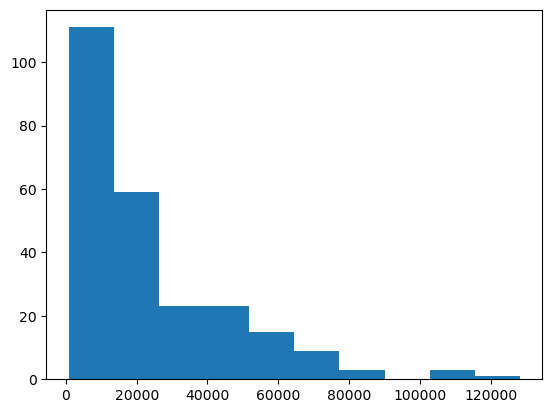

In [33]:
plt.hist(gdp_2020['GDP_Per_Capita'])

DENSITY PLOT

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

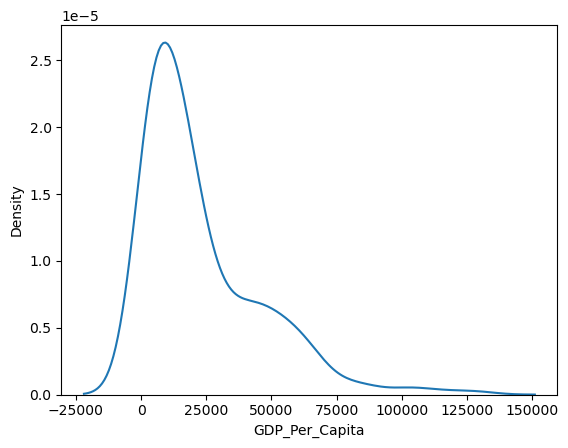

In [35]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

BOXPLOT

<Axes: ylabel='GDP_Per_Capita'>

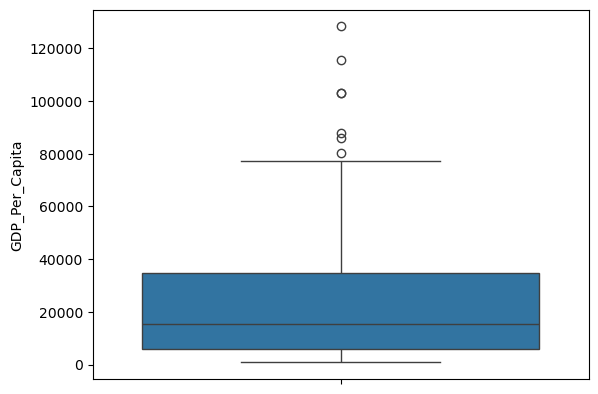

In [37]:
sns.boxplot(gdp_2020['GDP_Per_Capita'])

VIOLIN PLOT

<Axes: ylabel='GDP_Per_Capita'>

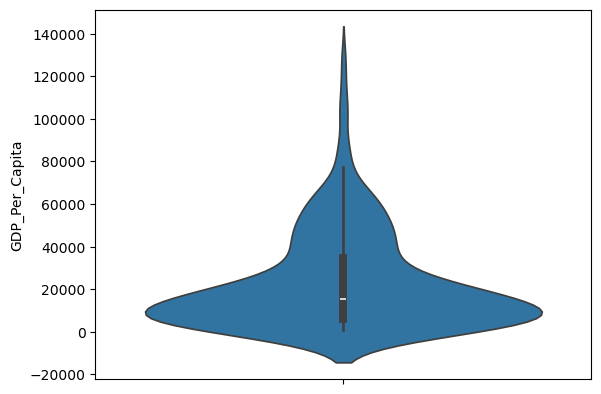

In [39]:
sns.violinplot(gdp_2020['GDP_Per_Capita'])

## 9. What was the median GDP per capita value in 2020?

In [41]:
gdp_2020.GDP_Per_Capita.median()

15309.23598817024

## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [43]:
gdp_decades = gdp_new[(gdp_new["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2010) | (gdp_df["Year"] == 2020)]

In [44]:
#or isin

In [45]:
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


BOXPLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

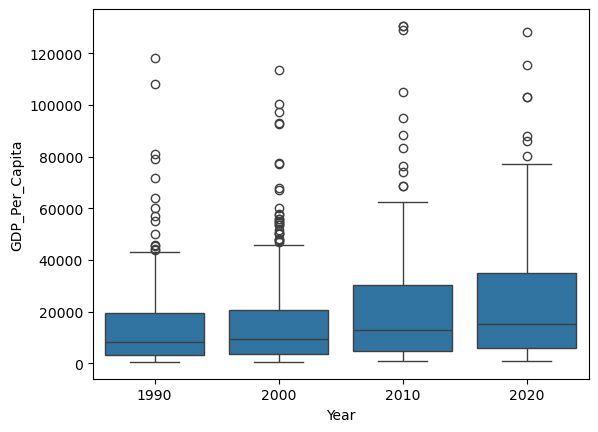

In [50]:
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

BARPLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

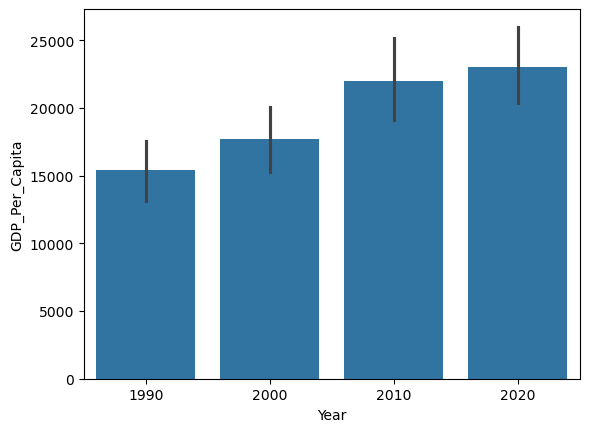

In [52]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

SCATTERPLOT

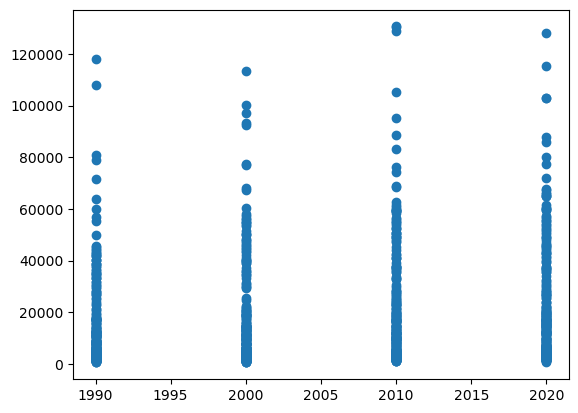

In [46]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

SCATTERPLOT WITH TREND OVERLAID

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

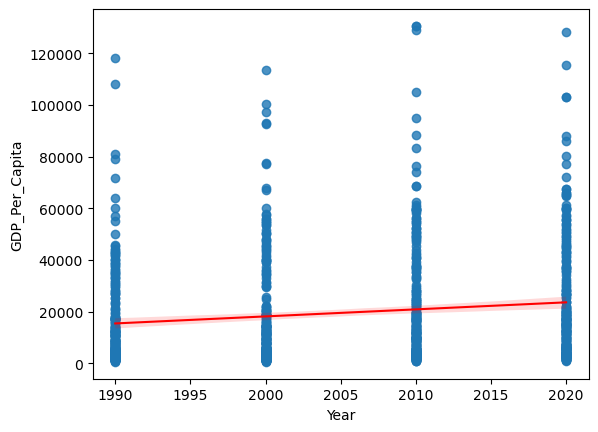

In [48]:
sns.regplot(
    x=gdp_decades["Year"], 
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5}, 
)

## 11. Which country was the first to have a GDP per capita greater than $100,000? (UAE, Brunei)

In [50]:
gdp_greater_100k = gdp_new[gdp_new['GDP_Per_Capita']>100000]

In [51]:
gdp_greater_100k.sort_values(by='Year', ascending = True)
print(gdp_greater_100k)

                   Country  Year  GDP_Per_Capita
750                Bermuda  2011   101174.504104
751                Bermuda  2010   105121.639689
752                Bermuda  2009   108091.644563
753                Bermuda  2008   115015.749469
754                Bermuda  2007   117742.118950
...                    ...   ...             ...
7821  United Arab Emirates  1996   100563.698291
7822  United Arab Emirates  1995   101412.082063
7825  United Arab Emirates  1992   101100.487512
7826  United Arab Emirates  1991   103098.537132
7827  United Arab Emirates  1990   108057.042464

[106 rows x 3 columns]


In [52]:
gdp_new[gdp_new['GDP_Per_Capita']>100000].sort_values(by= 'Year', ascending = True)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


## 12. Which country had the highest GDP per capita in 2020? (Luxembourg) Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [54]:
gdp_new[gdp_new['Year']==2020].sort_values(by= 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


In [55]:
lux = gdp_new[gdp_new["Country"] =='Luxembourg']

In [56]:
print(lux)

         Country  Year  GDP_Per_Capita
4423  Luxembourg  2023   130373.477942
4424  Luxembourg  2022   134507.667531
4425  Luxembourg  2021   135379.291201
4426  Luxembourg  2020   128256.560341
4427  Luxembourg  2019   131609.099616
4428  Luxembourg  2018   130415.193065
4429  Luxembourg  2017   131353.485059
4430  Luxembourg  2016   132836.085831
4431  Luxembourg  2015   129293.707435
4432  Luxembourg  2014   129443.183641
4433  Luxembourg  2013   129142.843309
4434  Luxembourg  2012   128099.279571
4435  Luxembourg  2011   129083.129771
4436  Luxembourg  2010   130620.266278
4437  Luxembourg  2009   128205.455863
4438  Luxembourg  2008   134973.375929
4439  Luxembourg  2007   137821.419596
4440  Luxembourg  2006   129480.260595
4441  Luxembourg  2005   124095.617345
4442  Luxembourg  2004   122956.102288
4443  Luxembourg  2003   119652.627050
4444  Luxembourg  2002   118024.021417
4445  Luxembourg  2001   115540.354519
4446  Luxembourg  2000   113436.588273
4447  Luxembourg  1999   

Text(0, 0.5, 'GDP per Capita')

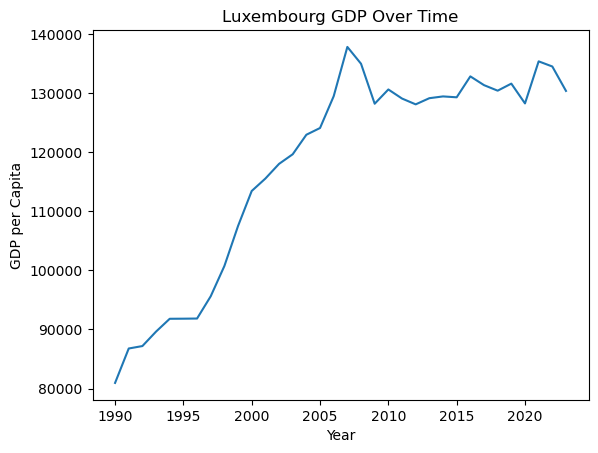

In [57]:
plt.plot(lux['Year'], lux['GDP_Per_Capita'])
plt.title('Luxembourg GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')

## 13. Which country had the lowest GDP per capita in 2020? (Burundi) Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [59]:
gdp_new[gdp_new['Year']==2020].sort_values(by= 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [60]:
bur = gdp_new[gdp_new["Country"] =='Burundi']
print(bur)

      Country  Year  GDP_Per_Capita
1043  Burundi  2023      828.861074
1044  Burundi  2022      829.387160
1045  Burundi  2021      836.665571
1046  Burundi  2020      833.920257
1047  Burundi  2019      855.732720
1048  Burundi  2018      868.555508
1049  Burundi  2017      880.993440
1050  Burundi  2016      897.459046
1051  Burundi  2015      918.557193
1052  Burundi  2014      977.765840
1053  Burundi  2013      970.375392
1054  Burundi  2012      958.657403
1055  Burundi  2011      951.188460
1056  Burundi  2010      947.621417
1057  Burundi  2009      944.629926
1058  Burundi  2008      957.222664
1059  Burundi  2007      951.290083
1060  Burundi  2006      954.190854
1061  Burundi  2005      938.381597
1062  Burundi  2004      965.204118
1063  Burundi  2003      955.669204
1064  Burundi  2002      998.561289
1065  Burundi  2001      983.396847
1066  Burundi  2000      988.036863
1067  Burundi  1999     1017.497778
1068  Burundi  1998     1052.807034
1069  Burundi  1997     1024

Text(0, 0.5, 'GDP per Capita')

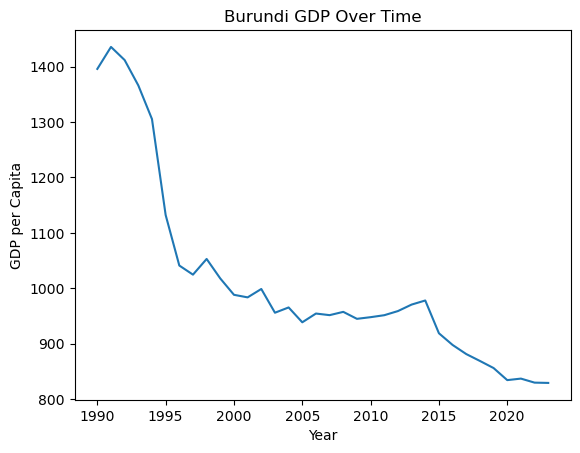

In [61]:
plt.plot(bur['Year'], bur['GDP_Per_Capita'])
plt.title('Burundi GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')

## Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [63]:
gdp_2020['GDP_Per_Capita'].mean()

23044.942555569738

In [64]:
gdp_2020['GDP_Per_Capita'].describe()

count       247.000000
mean      23044.942556
std       22856.889868
min         833.920257
25%        5857.324918
50%       15309.235988
75%       34823.614188
max      128256.560341
Name: GDP_Per_Capita, dtype: float64

In [65]:
gdp_1990 = gdp_new[gdp_new['Year']==1990]

In [66]:
gdp_1990['GDP_Per_Capita'].describe()

count       233.000000
mean      15378.121745
std       18030.094552
min         547.622781
25%        3346.541876
50%        8243.732655
75%       19417.220483
max      118163.683198
Name: GDP_Per_Capita, dtype: float64

## Higher mean in 2020, higher count in 2020, larger std in 2020, larger max in 2020

In [68]:
gdp_1990_2020 = gdp_new[gdp_new['Year'].isin([1990, 2020])]

In [69]:
gdp_1990_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
91,Africa Western and Central,1990,3299.401375


In [70]:
pivoted = gdp_1990_2020.pivot(index='Country', columns='Year', values='GDP_Per_Capita')

In [71]:
pivoted.columns = ['gdp_1990', 'gdp_2020']

In [72]:
lower_gdp_countries = pivoted[pivoted['gdp_2020'] < pivoted['gdp_1990']]

In [73]:
print(lower_gdp_countries)

                                               gdp_1990      gdp_2020
Country                                                              
Aruba                                      34579.220640  28521.688852
Barbados                                   16976.761648  15749.038017
Brunei                                    118163.683198  80280.897948
Burundi                                     1396.077627    833.920257
Central African Republic                    1481.252551   1136.570530
Congo                                       8699.526839   6350.509134
Dem. Rep. Congo                             2172.001597   1277.632863
Fragile and conflict affected situations    6062.707946   5271.014406
Gabon                                      23884.810700  18681.484074
Haiti                                       3946.365646   3229.475544
Kyrgyz Republic                             6095.681086   5537.795885
Liberia                                     1866.405481   1497.376924
Libya               

## 14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [75]:
import pandas as pd

In [76]:
internet_df = pd.read_csv('../data/internet_use.csv', engine= 'python', on_bad_lines = 'skip', skipfooter=299)

In [77]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


## 15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [79]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)

In [80]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [81]:
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Year": "Year", "Value": "Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


## 16. Look at the number of observations in this dataset per year. What do you notice?

In [83]:
internet_year_counts = internet_df.groupby('Year')['Country'].count().reset_index()
internet_year_counts = internet_year_counts.rename(columns={"Year": "Year", "Country": "Observations"})
internet_year_counts.head()

,Year,Observations
0,1990,225
1,1991,39
2,1992,50
3,1993,66
4,1994,92


In [84]:
internet_year_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year          34 non-null     int64
 1   Observations  34 non-null     int64
dtypes: int64(2)
memory usage: 676.0 bytes


In [85]:
print(internet_year_counts)

    Year  Observations
0   1990           225
1   1991            39
2   1992            50
3   1993            66
4   1994            92
5   1995           141
6   1996           177
7   1997           188
8   1998           195
9   1999           207
10  2000           210
11  2001           212
12  2002           214
13  2003           208
14  2004           210
15  2005           212
16  2006           212
17  2007           217
18  2008           214
19  2009           214
20  2010           209
21  2011           214
22  2012           209
23  2013           203
24  2014           204
25  2015           203
26  2016           206
27  2017           205
28  2018           174
29  2019           185
30  2020           186
31  2021           186
32  2022           184
33  2023            11


In [86]:
internet_year_counts["Observations"].max()

225

In [87]:
internet_year_counts["Observations"].min()

11

Most observations in 1990 (225), and lowest number of observations in 2023 (11). Is the data in 2023 incomplete?

## 17. What is the first year to have a non-zero internet users percentage value?
Answer: 1990 (Denmark, 0.097277)

In [90]:
internet_df.sort_values(by='Internet_Users_Pct', ascending = True)

,Country,Year,Internet_Users_Pct
4893,Seychelles,1990,0.0
647,Bhutan,1990,0.0
4003,New Caledonia,1990,0.0
2129,Gambia,1990,0.0
5413,Tanzania,1990,0.0
...,...,...,...
4790,Saudi Arabia,2022,100.0
4791,Saudi Arabia,2021,100.0
5718,United Arab Emirates,2020,100.0
4497,Qatar,2022,100.0


In [91]:
pct_not_0 = internet_df[internet_df['Internet_Users_Pct']>0]

In [92]:
pct_not_0.sort_values(by='Internet_Users_Pct', ascending=True)

,Country,Year,Internet_Users_Pct
1889,Ethiopia,1995,0.000018
5445,Thailand,1991,0.000052
1425,Cuba,1995,0.000092
1535,Democratic Republic of the Congo,1996,0.000108
2646,India,1992,0.000111
...,...,...,...
4497,Qatar,2022,100.000000
399,Bahrain,2021,100.000000
5717,United Arab Emirates,2021,100.000000
398,Bahrain,2022,100.000000


In [93]:
earliest_year = pct_not_0[pct_not_0['Internet_Users_Pct']>0] ['Year'].min()
print(earliest_year)

1990


In [94]:
earliest = pct_not_0[pct_not_0['Internet_Users_Pct'] > 0].sort_values('Year').iloc[0]
print(earliest)

Country                Denmark
Year                      1990
Internet_Users_Pct    0.097277
Name: 1570, dtype: object


## 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [96]:
internet_compare = internet_df[(internet_df["Year"] == 2000) | (internet_df["Year"] == 2014)]

In [97]:
print(internet_compare)

          Country  Year  Internet_Users_Pct
5     Afghanistan  2014            7.000000
28        Albania  2014           54.300000
42        Albania  2000            0.114097
57        Algeria  2014           29.500000
71        Algeria  2000            0.491706
...           ...   ...                 ...
6017        Yemen  2000            0.082500
6031       Zambia  2014            6.500000
6045       Zambia  2000            0.191072
6061     Zimbabwe  2014           16.364700
6075     Zimbabwe  2000            0.401434

[414 rows x 3 columns]


In [98]:
by_year = internet_compare.sort_values(by='Year')

In [99]:
print(by_year)

                   Country  Year  Internet_Users_Pct
6075              Zimbabwe  2000            0.401434
2340            Guadeloupe  2000            5.825250
2363                  Guam  2000           16.113100
4888            Seychelles  2000            7.395630
2393             Guatemala  2000            0.712333
...                    ...   ...                 ...
2656             Indonesia  2014           17.143200
2624                 India  2014           13.500000
2592               Iceland  2014           98.158000
2772                Israel  2014           75.017800
3030  Korea (Republic  of)  2014           87.556800

[414 rows x 3 columns]


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

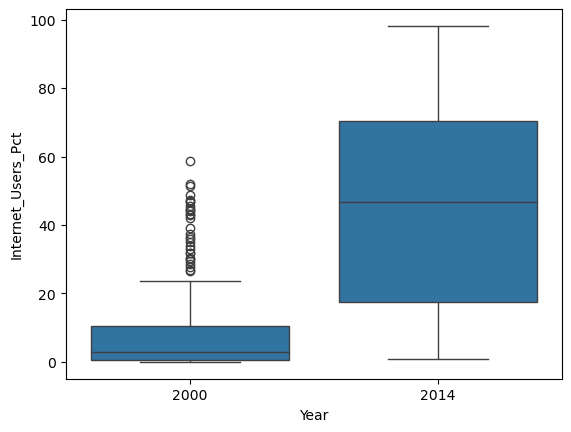

In [100]:
sns.boxplot(x=by_year["Year"], y=by_year["Internet_Users_Pct"])

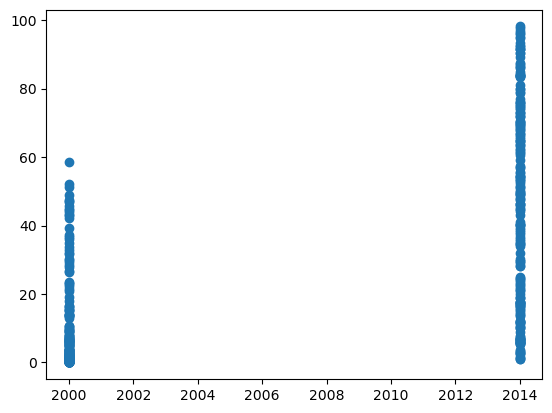

In [101]:
plt.scatter(by_year.Year, by_year.Internet_Users_Pct)

There is a lot more data in 2014

## 19. For how many countries was the percentage of internet users below 5% in 2014?

In [104]:
internet_2014 = internet_df[(internet_df["Year"] == 2014)]

In [105]:
print(internet_2014)

                  Country  Year  Internet_Users_Pct
5             Afghanistan  2014              7.0000
28                Albania  2014             54.3000
57                Algeria  2014             29.5000
87                Andorra  2014             86.1000
114                Angola  2014             21.3623
...                   ...   ...                 ...
5937             Viet Nam  2014             41.0000
5960  Virgin Islands (US)  2014             50.0700
6003                Yemen  2014             22.5500
6031               Zambia  2014              6.5000
6061             Zimbabwe  2014             16.3647

[204 rows x 3 columns]


In [106]:
internet2014_below5 = internet_2014[internet_2014['Internet_Users_Pct']<5]

In [107]:
print(internet2014_below5)

                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


In [108]:
internet2014_below5.count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

Answer: 10 countries

## 20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [111]:
gdp_and_internet_use = pd.merge(gdp_new, internet_df, on=['Country', 'Year'], how = 'outer')

In [112]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


## 21. Find the three countries with the highest internet users percentage in 2014. (ICELAND, FALKLAND ISLANDS, BERMUDA) Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [114]:
merged_2014 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2014)]

In [115]:
print(merged_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                    Afghanistan  2014     3017.942544              7.0000
49    Africa Eastern and Southern  2014     4052.851526                 NaN
83     Africa Western and Central  2014     4816.917355                 NaN
117                       Albania  2014    12788.747231             54.3000
151                       Algeria  2014    15073.762940             29.5000
...                           ...   ...             ...                 ...
9361           West Bank and Gaza  2014     5990.426615                 NaN
9395                        World  2014    17307.606891                 NaN
9424                        Yemen  2014             NaN             22.5500
9455                       Zambia  2014     3585.577485              6.5000
9489                     Zimbabwe  2014     3360.552173             16.3647

[285 rows x 4 columns]


In [116]:
merged_2014.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005
2168,Denmark,2014,60992.212220,95.9935
...,...,...,...,...
8867,TÃ¼rkiye,2014,24573.488878,NaN
9103,Upper middle income,2014,15312.435710,NaN
9292,Virgin Islands,2014,42853.898660,NaN
9361,West Bank and Gaza,2014,5990.426615,NaN


## changed after talking to Adell - had Falkland Islands but nothing coming up for GDP

In [118]:
top_internet_users = gdp_and_internet_use[(gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway"]))]

In [119]:
print(top_internet_users)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
800   Bermuda  1990    79109.890650              0.0000
801   Bermuda  1991    75754.494259                 NaN
802   Bermuda  1992    75160.932166                 NaN
803   Bermuda  1993    76883.813796                 NaN
804   Bermuda  1994    76850.912239                 NaN
...       ...   ...             ...                 ...
6472   Norway  2019    87646.526816             98.0000
6473   Norway  2020    86018.320698             94.6076
6474   Norway  2021    88903.801029             99.0000
6475   Norway  2022    90756.895767             99.0000
6476   Norway  2023    90160.157502                 NaN

[102 rows x 4 columns]


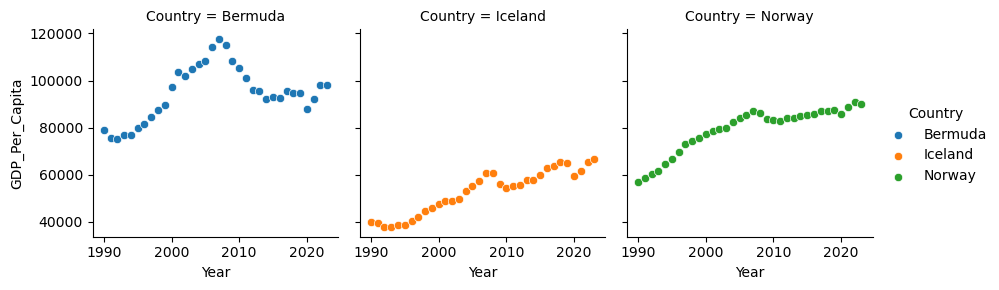

In [120]:
grid = sns.FacetGrid(top_internet_users, col="Country", hue="Country")
grid.map_dataframe(sns.scatterplot, x = "Year", y = "GDP_Per_Capita")
grid.add_legend()

## trying again with Falkland Islands(below)

In [122]:
top_internet_users_v2 = gdp_and_internet_use[(gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Norway"]))]

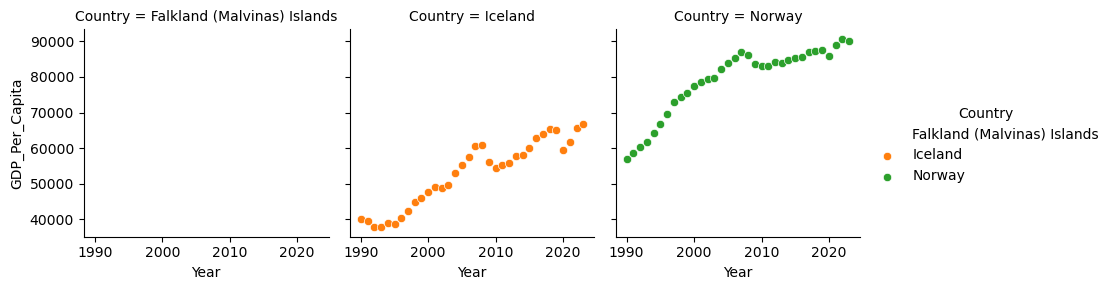

In [123]:
grid = sns.FacetGrid(top_internet_users_v2, col="Country", hue="Country")
grid.map_dataframe(sns.scatterplot, x = "Year", y = "GDP_Per_Capita")
grid.add_legend()

## 22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [125]:
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2014)]

In [126]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


## 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

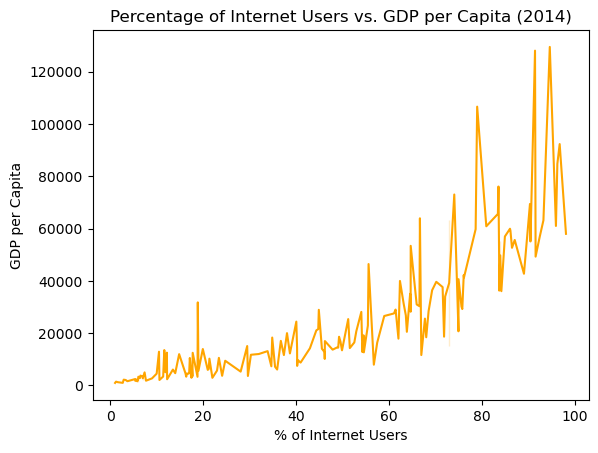

In [128]:
sns.lineplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita", color="orange")
plt.xlabel("% of Internet Users")
plt.ylabel("GDP per Capita")
plt.title("Percentage of Internet Users vs. GDP per Capita (2014)")
plt.show()

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

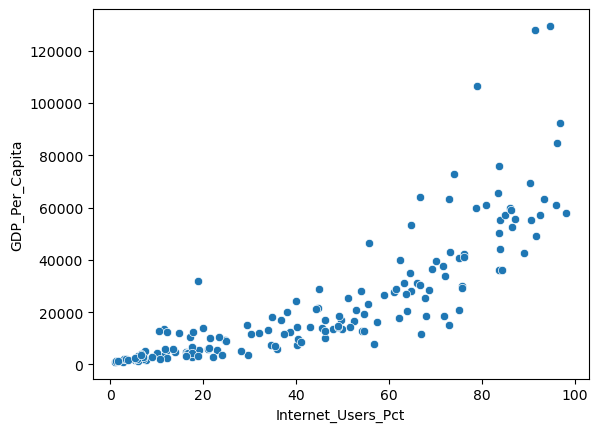

In [129]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita")

In general, it looks like there's a relationship between GDP per Capita and %age of Internet Users in each country. There are some outliers, like Iceland (98% internet but mid-range GDP)

In [131]:
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                    Afghanistan  2014     3017.942544              7.0000
49    Africa Eastern and Southern  2014     4052.851526                 NaN
83     Africa Western and Central  2014     4816.917355                 NaN
117                       Albania  2014    12788.747231             54.3000
151                       Algeria  2014    15073.762940             29.5000
...                           ...   ...             ...                 ...
9361           West Bank and Gaza  2014     5990.426615                 NaN
9395                        World  2014    17307.606891                 NaN
9424                        Yemen  2014             NaN             22.5500
9455                       Zambia  2014     3585.577485              6.5000
9489                     Zimbabwe  2014     3360.552173             16.3647

[285 rows x 4 columns]


In [132]:
gdp_and_internet_use_2014.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5234,"Macao SAR, China",2014,162582.374111,NaN
5200,Luxembourg,2014,129443.183641,94.6702
7045,Qatar,2014,128013.987046,91.4900
7566,Singapore,2014,106604.492771,79.0292
824,Bermuda,2014,92298.387811,96.8000
...,...,...,...,...
8106,State of Palestine,2014,NaN,53.6652
8899,Türkiye,2014,NaN,51.0374
9242,Venezuela,2014,NaN,57.0000
9322,Virgin Islands (US),2014,NaN,50.0700


In [133]:
gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005
2168,Denmark,2014,60992.212220,95.9935
...,...,...,...,...
8867,TÃ¼rkiye,2014,24573.488878,NaN
9103,Upper middle income,2014,15312.435710,NaN
9292,Virgin Islands,2014,42853.898660,NaN
9361,West Bank and Gaza,2014,5990.426615,NaN


## 24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [135]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.dropna(subset=['GDP_Per_Capita'])

In [136]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

In [137]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
15,Afghanistan,2014,3017.942544,7.0,Low
49,Africa Eastern and Southern,2014,4052.851526,NaN,Low
83,Africa Western and Central,2014,4816.917355,NaN,Low
117,Albania,2014,12788.747231,54.3,Medium
151,Algeria,2014,15073.762940,29.5,Medium


## 25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [139]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\Lucy\AppData\Local\Temp\ipykernel_4164\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64

## Median of low: 11.6, Median of medium: 44.59, Median of high: 75.98

## BONUS: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.